In [1]:
%cd ~/image_similarity/atf_images/
%ls

/Users/ryoungblood/image_similarity/atf_images
credentials.txt  images/          images_jpg/      part_locs.py
image_urls.txt   images2/         part_locs.json   parts/


In [2]:
import os
import cv2
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

import json

In [3]:
base_dir = os.getcwd()
source_dir = os.path.join(base_dir,'images')
dest_dir = os.path.join(base_dir,'images_jpg')
parts_dir = os.path.join(base_dir,'parts')

In [4]:
image_dict = {}

### read image_urls.txt and save each image locally into /images

### dict: initalize top level items as 0-n
### dict: add 'url'

### make a copy of the images with extensions
### dict: add 'filepath'

In [5]:
url_list_file = os.path.join(base_dir,'image_urls.txt')
cred_file = os.path.join(base_dir,'credentials.txt')
image_dir = os.path.join(base_dir,'images')
with open(cred_file,'r') as c:
    creds = c.readline().rstrip() # rstrip strips the newline character
    with open(url_list_file,'r') as f:
        for i, line in enumerate(f):
            line = line.rsplit('\n',1)[0] # strip newline character

            url = line.split('//',1)[0] + '//' + creds +line.split('//',1)[1]
            image = url.rsplit('/',1)[1]

            #img_path = os.path.join(image_dir,image)
            #urllib.urlretrieve(url,img_path)
            
            temp_path = os.path.join(image_dir,'tempfile')
            urllib.urlretrieve(url,temp_path)
            
            img = cv2.imread(temp_path)
            img_path = os.path.join(image_dir,str(i)+'.jpg')
            cv2.imwrite(img_path,img)
            os.remove(temp_path)
            
            image_dict[i] = {}
            image_dict[i]['url'] = url
            image_dict[i]['filepath'] = img_path
            image_dict[i]['image'] = img
            

### Human manually crops part-level features into separate images

### Load part coordinates from json file

### Display single image and its part images

full image:


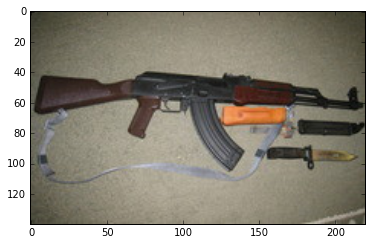

{u'location': [[950, 1750], [150, 300]]}
secondary_handle:


TypeError: Image data can not convert to float

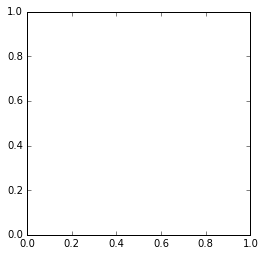

In [98]:
# Load part coordinates from json file
part_locs_file = os.path.join(base_dir,'part_locs.json')
with open(part_locs_file,'r') as f:
    part_locs_text = f.read()
    part_locs = json.loads(part_locs_text)

# Display single image and its part images    
img_num = 4
img = image_dict[img_num]['image']
image_dict[img_num]['guns'] = []
image_dict[img_num]['guns'].append({'parts': {}})

print('full image:')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
#for image, image_data in part_locs.items():
for gun in part_locs[str(img_num)]:
    for part, values in gun['parts'].items():
        print(values)
        center, size = values['location'][0], values['location'][1]
        part_img = img[center[0]-size[0]:center[0]+size[0],
                       center[1]-size[1]:center[1]+size[1]]
        
        # add part to index
        image_dict[img_num]['parts'][part] = {} 
        # add part coordinates to index
        image_dict[img_num]['parts'][part]['coordinates'] = coords 
        # add part image to index
        image_dict[img_num]['parts'][part]['image'] = part_img
        # add part path to index and store image there
        part_path = os.path.join(parts_dir,str(img_num)+'_'+part+'.jpg')
        cv2.imwrite(part_path,part_img)
        image_dict[img_num]['parts'][part]['filepath'] = part_path

        print(part+':')
        plt.imshow(cv2.cvtColor(part_img,cv2.COLOR_BGR2RGB))
        plt.show()


In [ ]:
image_dict[0]['parts'].keys()

In [ ]:
trigger
barrel
barrel_extension
butt
handle
secondary_handle
clip
scope

add fields for:
    type
    legality (at part level)
    
    
change coord system to be center + size in each dimension
add type and legality properties at the part level

more generous margins

need to address multiple guns per image
so mult img per set, mult guns per img, and mult parts per gun

In [ ]:
'''
image_dict[0]['parts'] = {
    'trigger': {'coordinates': [(140,190),(190,240)]},
    'barrel': {'coordinates': [(150,420),(250,650)]},
    'butt': {'coordinates': [(90,20),(170,180)]},
    'rear_handle': {''}
}
'''